In [1]:
import numpy as np
import sys
import os
import glob
import csv
import re
import time
import copy

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits import mplot3d

import sys
sys.path.append("..")

from sicm import io, plots, analysis, utils

%matplotlib inline
plt.style.use("seaborn") # plt.style.available

In [7]:
# Globals
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"

## Cyclic Voltametry

In [8]:
# Locals
exp_name = "cv2"

In [9]:
files, date = io.get_files(datadir, exp_name)
result = io.load_result(files)

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (7802,)


Text(0, 0.5, 'LineNumber')

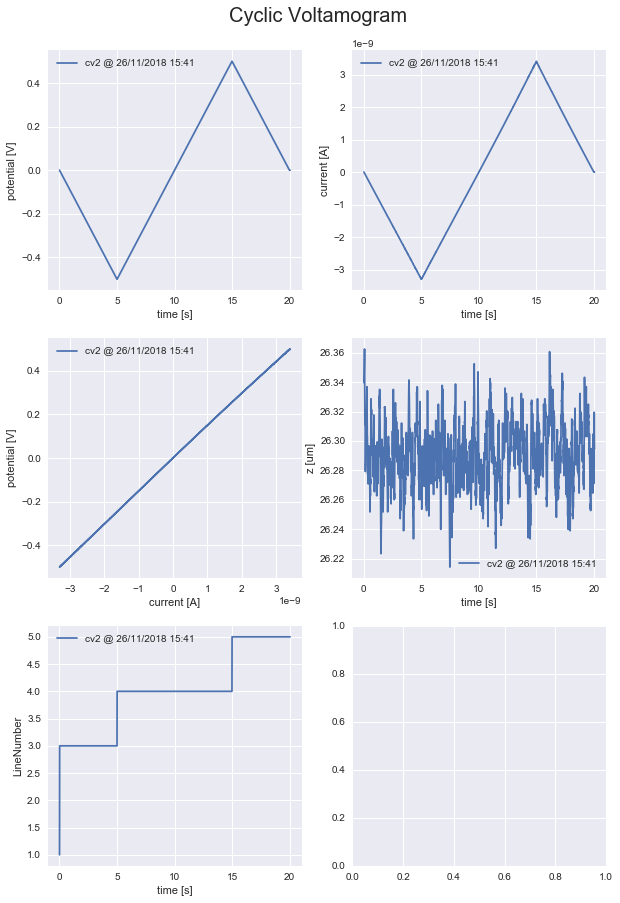

In [10]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))
axs = axs.flatten()
fig.suptitle("Cyclic Voltamogram", size = 20, y = 0.92)

axs[0].plot(np.cumsum(result["dt(s)"]), result["V1(V)"])
axs[0].legend(["{} @ {}".format(exp_name, date)])
axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("potential [V]")

axs[1].plot(np.cumsum(result["dt(s)"]), result["Current1(A)"])
axs[1].legend(["{} @ {}".format(exp_name, date)])
axs[1].set_xlabel("time [s]")
axs[1].set_ylabel("current [A]")

axs[2].plot(result["Current1(A)"], result["V1(V)"])
axs[2].legend(["{} @ {}".format(exp_name, date)])
axs[2].set_xlabel("current [A]")
axs[2].set_ylabel("potential [V]")

axs[3].plot(np.cumsum(result["dt(s)"]), result["Z(um)"])
axs[3].legend(["{} @ {}".format(exp_name, date)])
axs[3].set_xlabel("time [s]")
axs[3].set_ylabel("z [um]")

axs[4].plot(np.cumsum(result["dt(s)"]), result["LineNumber"])
axs[4].legend(["{} @ {}".format(exp_name, date)])
axs[4].set_xlabel("time [s]")
axs[4].set_ylabel("LineNumber")


# not used
# xticks = ax.get_xticks(); xmin = np.min(xticks); xmax = np.max(xticks);
# yticks = ax.get_yticks(); ymin = np.min(yticks); ymax = np.max(yticks);
# ax.set_xticks(np.arange(xmin, xmax,  (xmax-xmin) / 10))
# ax.set_yticks(np.arange(ymin, ymax,  (ymax-ymin) / 10))

## Hopping Scan

In [11]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
import numpy as np

%load_ext autoreload
%autoreload 2

In [119]:
# Globals
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"
datadir = "S:/UsersData/Martin/2018/12_Dec/12/sicm/exp2"
# datadir = "S:/UsersData/Martin/2018/12_Dec/12/sicm/exp1"
datadir = "S:/UsersData/Martin/2018/12_Dec/21"
# datadir = "S:/UsersData/Martin/2018/12_Dec/21"
# datadir = "S:/UsersData/Martin/2018/12_Dec/21"
# Locals
exp_name = "scan3"
exp_name = "scan_hopping_qtf_current_slow"
# exp_name = "scan_hopping_qtf_current"
exp_name = "scan1"
# exp_name = "scan2_tip_again_perhaps_broken"
# exp_name = "scan3_long_things_go_crazy_at_end"

In [120]:
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

uniqs, cnts = np.unique(result_["LineNumber"], return_counts=True)
linenos = np.arange(5, max(uniqs), 3)
result, idxs = io.downsample_to_linenumber(result_, linenos)

Avaliable data:
dict_keys(['dt(s)', 'X(um)', 'FeedbackType', 'V1(V)', 'Y(um)', 'LineNumber', 'Z(um)', 'Current1(A)'])
Number of datapoints = (233185,)
Number of datapoints = 195350


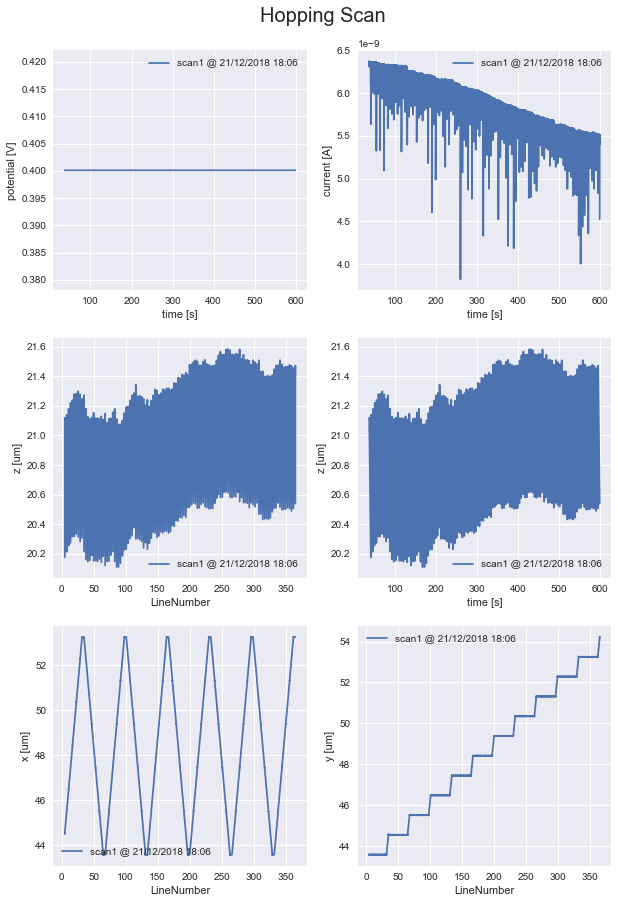

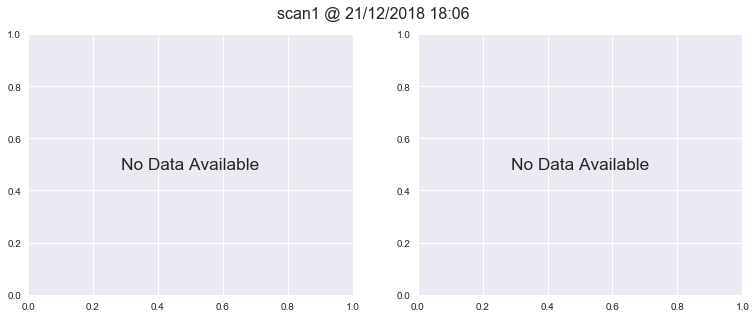

In [121]:
# sel = idxs # slect only last or first
sel = np.arange(0, len(result["LineNumber"])//1) # select all
plots.plot_hopping_scan(result, sel, exp_name, date)

# Make it OOP

In [32]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
from sicm.experiments.scan import Scan
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
scan = Scan(datadir = "S:/UsersData/Martin/2019/01_Jan/11/",
               exp_name = "scan2")

Avaliable data:
dict_keys(['Y(um)', 'LockinPhase', 'LockinAmplitude', 'LineNumber', 'dt(s)', 'Z(um)', 'X(um)'])
Number of datapoints = (16250876,)
Number of datapoints = 13740657


In [33]:
print("xmax: {}, xmin: {},\nymax: {}, ymin: {}\nxdiff: {}, ydiff: {}".\
      format(
            scan.dsdata["X(um)"].max(),
            scan.dsdata["X(um)"].min(),
            scan.dsdata["Y(um)"].max(),
            scan.dsdata["Y(um)"].min(),
            scan.dsdata["X(um)"].max() - scan.dsdata["X(um)"].min(),
            scan.dsdata["Y(um)"].max() - scan.dsdata["Y(um)"].min()))

xmax: 58.381908628, xmin: 49.867244484,
ymax: 50.82247383, ymin: 42.115543077
xdiff: 8.514664144000001, ydiff: 8.706930753000002


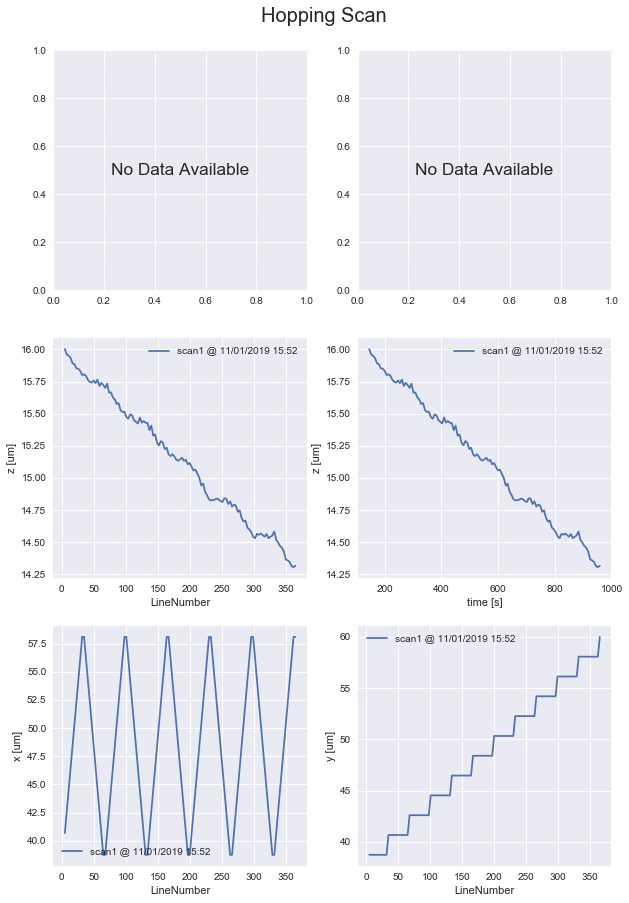

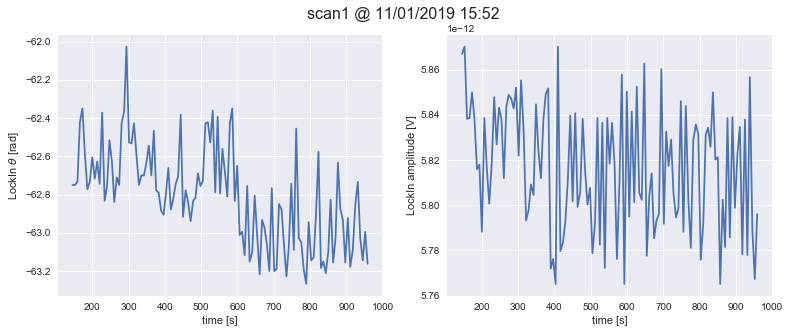

In [23]:
scan.plot_hopping_scan()

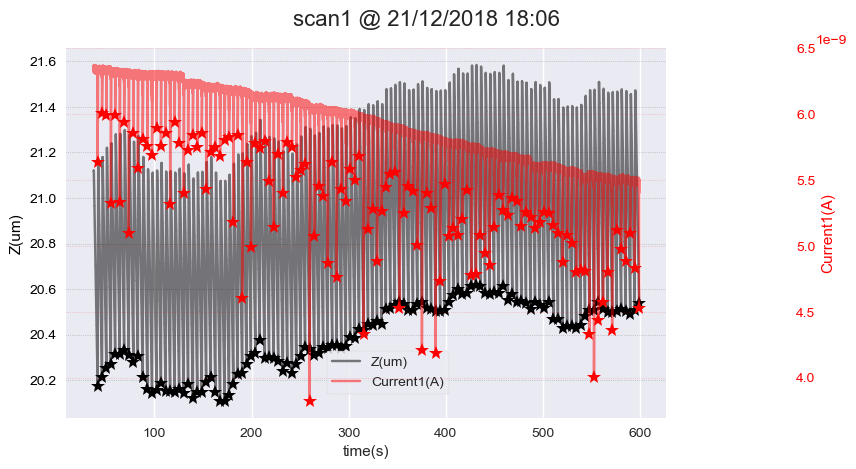

In [137]:
scan.plot_hops()

Saved dataframe to S:/UsersData/Martin/2018/12_Dec/21\scan1_annot.pkl.


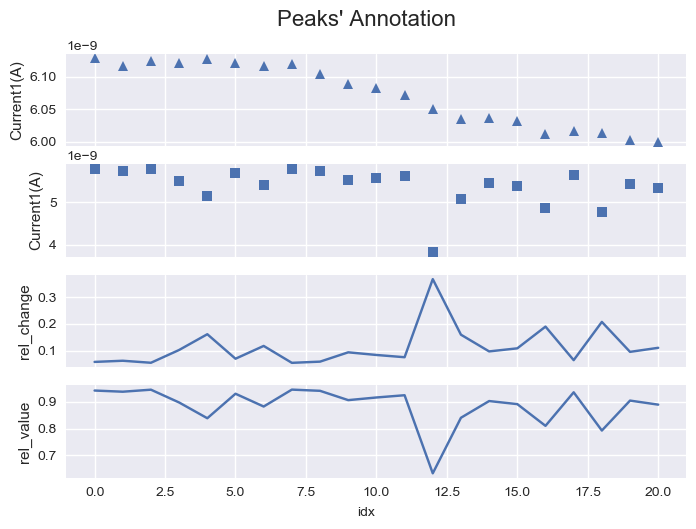

In [138]:
scan.annotate_peaks(sel = [200.0, 300.0], window_size = 250)

# Approach

In [34]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
from sicm.experiments.approach import Approach
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
app = Approach(datadir = "S:/UsersData/Martin/2019/01_Jan/11",
              exp_name = "approach1")

Avaliable data:
dict_keys(['dt(s)', 'LineNumber', 'LockinPhase', 'LockinAmplitude', 'Z(um)'])
Number of datapoints = (134636,)


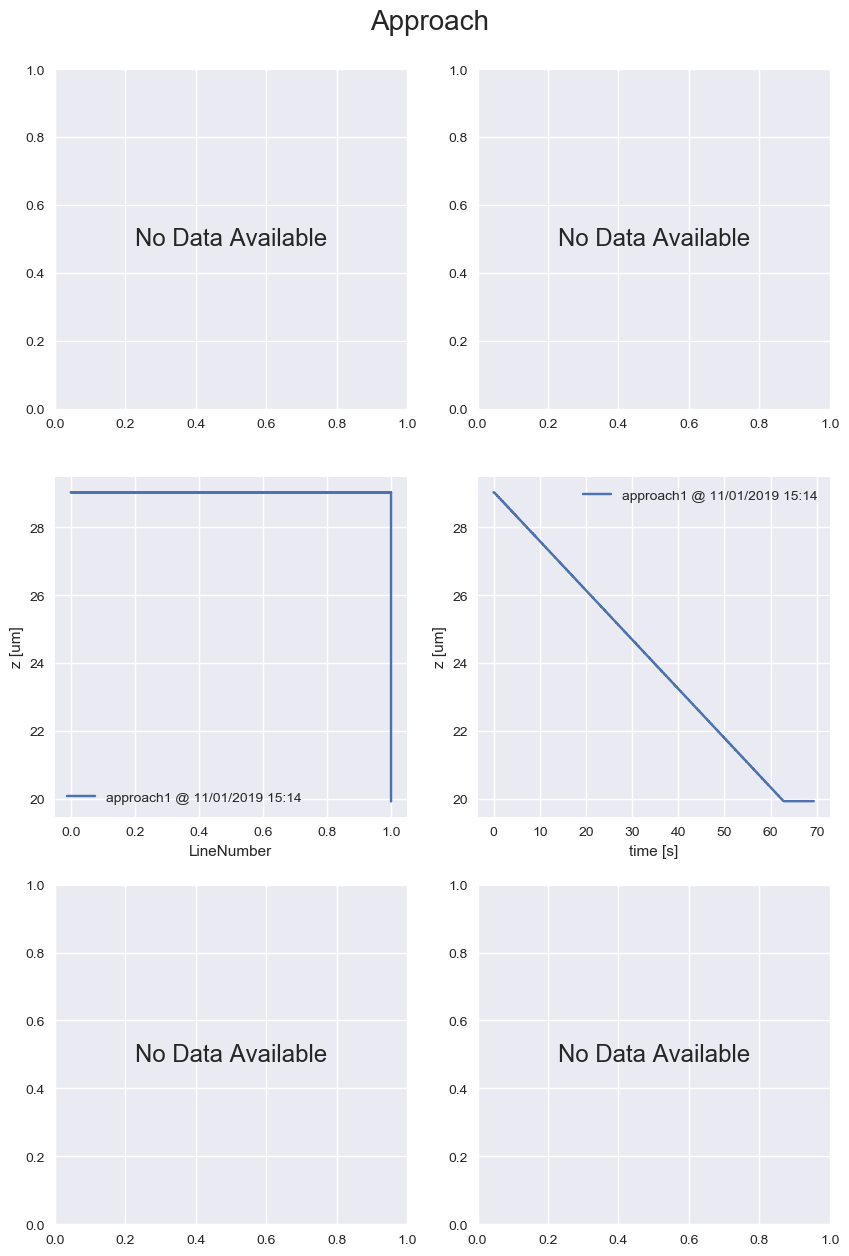

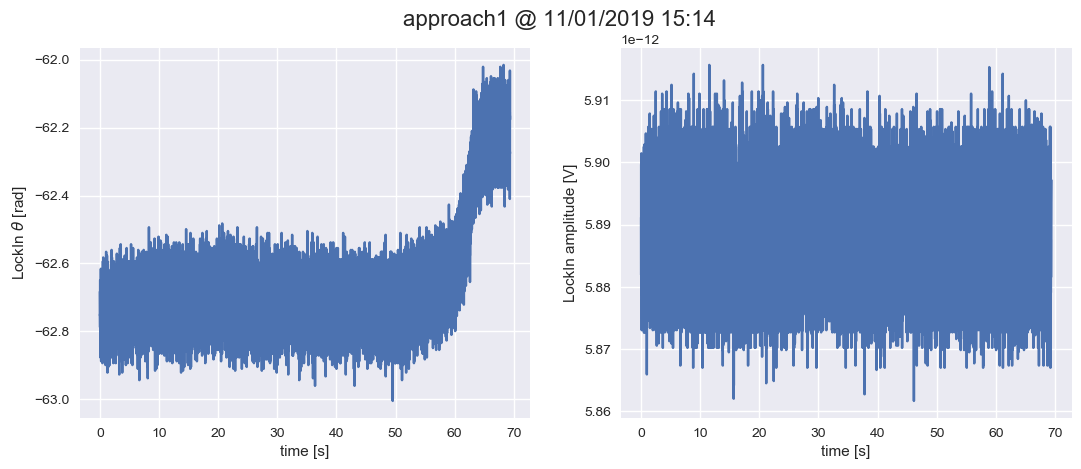

In [36]:
# this is very simplistic but does the job for now.
app.plot()

> c:\users\mholub\git\sicm\sicm\measurements\signal.py(147)_get_psd()
-> if np.max(np.abs(yy)) < 1.0:
(Pdb) c


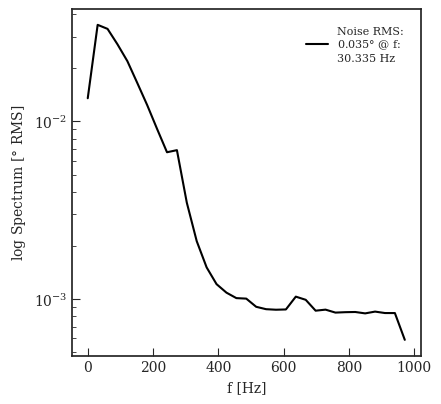

In [50]:
sig = Signal(x = np.cumsum(app.dsdata["dt(s)"]), 
                      y = app.dsdata["LockinPhase"])
sig.analyze(range = [0., 50.0], what = "psd")

# Getting noise level

In [3]:
import sys
sys.path.append("..")

from sicm import io
from sicm.sicm import Signal
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Do it from `Watch Current` Data

In [23]:
datadir = "S:/UsersData/Martin/2019/01_Jan/07"
exp_name = "0v_noise_level2"
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

Avaliable data:
dict_keys(['Current1(A)', 'LineNumber', 'dt(s)', 'V1(V)'])
Number of datapoints = (206369,)


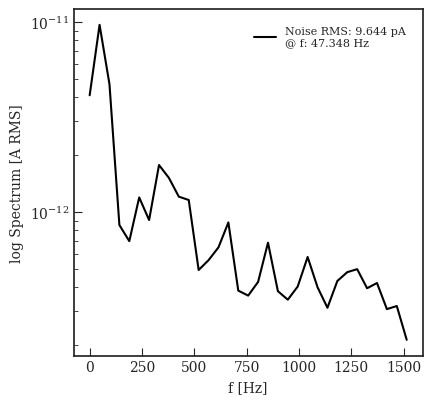

In [31]:
sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
sig.analyze(what = "psd", range = [30.0, 40.0])

## Do it from `Approach Data`

In [4]:
datadir = "S:/UsersData/Martin/2019/01_Jan/07"
exp_name = "approach_too_low_thresh_perhaps"

files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

# get idea of range to plot
# plots.plot_hopping_scan(result_, None, exp_name, date)

Avaliable data:
dict_keys(['V2(V)', 'Current1(A)', 'dt(s)', 'V1(V)', 'LineNumber', 'Z(um)'])
Number of datapoints = (291925,)


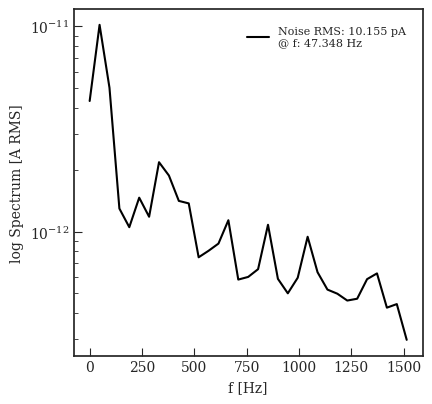

In [22]:
sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
sig.analyze(range = [0, -1], what = "psd")